# <center>Portafolio optimization project</center>
### **<center> Monte Carlo Simulation Applied to Markowitz Portfolio Theory  </center>**

### **<center>Mijail Dragowski</center>**
### **<center>2023</center>**

## Import the necessary libraries


In [1]:
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## load the Stocks  data


In [31]:
Exxon_Mobil_Corporation=yf.download("XOM", start= "2017-01-01", end= "2022-12-31")["Adj Close"]
Exxon_Mobil_Corporation=pd.DataFrame(Exxon_Mobil_Corporation)
Exxon_Mobil_Corporation = Exxon_Mobil_Corporation.rename(columns={'Adj Close': "EXXON"})
Exxon_Mobil_Corporation.head()

[*********************100%***********************]  1 of 1 completed


,EXXON
Date,
2017-01-03,66.807999
2017-01-04,66.072960
2017-01-05,65.087997
2017-01-06,65.051239
2017-01-09,63.978077


In [3]:
APPLE= yf.download("AAPL", start= "2017-01-01", end= "2022-12-31")["Adj Close"]
APPLE=pd.DataFrame(APPLE)
APPLE = APPLE.rename(columns={'Adj Close': "APPLE"})

APPLE.head()

[*********************100%***********************]  1 of 1 completed


,APPLE
Date,
2017-01-03,27.133326
2017-01-04,27.102953
2017-01-05,27.240784
2017-01-06,27.544479
2017-01-09,27.796770


In [4]:
Coca_cola=yf.download("KO", start= "2017-01-01", end= "2022-12-31")["Adj Close"]
Coca_cola=pd.DataFrame(Coca_cola)
Coca_cola = Coca_cola.rename(columns={'Adj Close': "Coca_cola"})

Coca_cola.head()

[*********************100%***********************]  1 of 1 completed


,Coca_cola
Date,
2017-01-03,34.493877
2017-01-04,34.370102
2017-01-05,34.452625
2017-01-06,34.444374
2017-01-09,34.097778


In [5]:
Diageo=yf.download("DEO", start= "2017-01-01", end= "2022-12-31")["Adj Close"]
Diageo=pd.DataFrame(Diageo)
Diageo = Diageo.rename(columns={'Adj Close': "DEO"})
Diageo.head()

[*********************100%***********************]  1 of 1 completed


,DEO
Date,
2017-01-03,89.782524
2017-01-04,90.901894
2017-01-05,91.978233
2017-01-06,91.607964
2017-01-09,91.754349


In [32]:
stocks = pd.concat([Exxon_Mobil_Corporation,APPLE,Coca_cola,Diageo],axis=1)
stocks.tail()

,EXXON,APPLE,Coca_cola,DEO
Date,,,,
2022-12-23,107.850105,131.658981,63.820000,178.527145
2022-12-27,109.348579,129.831772,64.209999,178.031570
2022-12-28,107.552391,125.847855,63.570000,176.614227
2022-12-29,108.366135,129.412415,63.950001,177.843246
2022-12-30,109.457741,129.731918,63.610001,176.614227


## Adjusted closing price time series chart


<AxesSubplot:title={'center':'Adj Close price'}, xlabel='Date'>

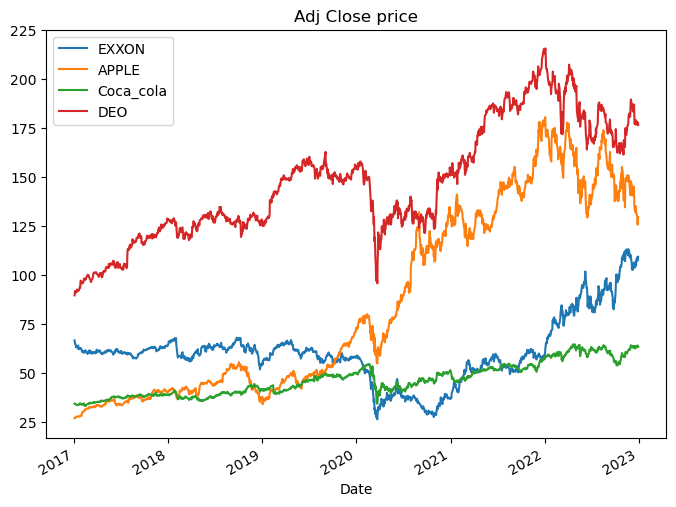

In [33]:
stocks.plot(figsize=(8,6),title='Adj Close price')


## Calculation of the cumulative return of each action during the analyzed period 


In [34]:
stocks['Exxon_Cumulative Return'] = (1 + stocks['EXXON'].pct_change(1)).cumprod()
stocks['APPLE_Cumulative Return'] = (1 + stocks['APPLE'].pct_change(1)).cumprod()
stocks['Coca_cola_Cumulative Return'] = (1 + stocks['Coca_cola'].pct_change(1)).cumprod()
stocks['DEO_Cumulative Return'] = (1 + stocks['DEO'].pct_change(1)).cumprod()

## Cumulative return graph


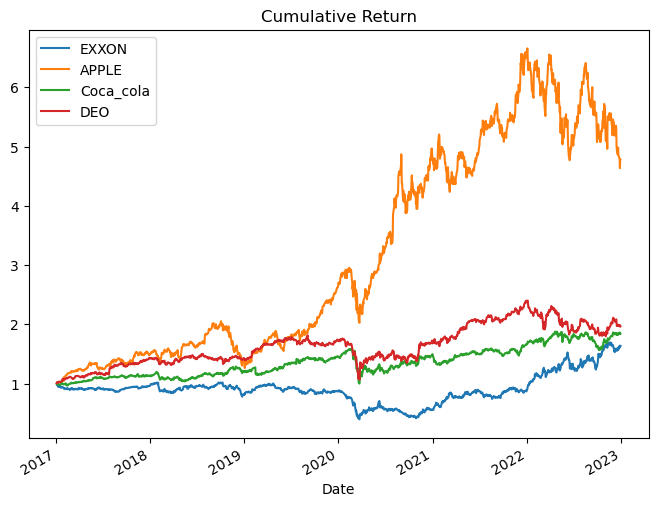

In [35]:
stocks['Exxon_Cumulative Return'].plot(label='EXXON',figsize=(8,6),title='Cumulative Return')
stocks['APPLE_Cumulative Return'].plot(label='APPLE')
stocks['Coca_cola_Cumulative Return'].plot(label='Coca_cola')
stocks['DEO_Cumulative Return'].plot(label='DEO')
plt.legend()

## Random allocations for the stocks

Let's pretend we had the following random allocations for our  USD 1000000 total portfolio:

* 45% in XOM
* 5% in APPLE
* 40% in Coca cola
* 10% in DEO


In [36]:
stocks= stocks.drop("2017-01-03")
stocks["Position_value_EXXON"]=stocks["Exxon_Cumulative Return"]*0.45*1000000
stocks["Position_value_APPLE"]=stocks["APPLE_Cumulative Return"]*0.05*1000000
stocks["Position_value_Coca_cola"]=stocks["Coca_cola_Cumulative Return"]*0.4*1000000
stocks["Position_value_DEO"]=stocks["DEO_Cumulative Return"]*0.1*1000000


## New data frame with the new position values


In [37]:
port_val=stocks.loc[:,[ "Position_value_APPLE", "Position_value_Coca_cola", "Position_value_DEO","Position_value_EXXON"]]
port_val.fillna(0, inplace=True)

port_val['Total Pos'] = port_val.sum(axis=1)



## Calculation of return, risk and sharpe ratio of the portfolio with random allocations


In [12]:

port_val['Daily Return'] = port_val['Total Pos'].pct_change(1)
port_val.fillna(0, inplace=True)
cum_ret = 100 * (port_val['Total Pos'][-1]/port_val['Total Pos'][1] -1 )
Avg_Daily_Return=port_val['Daily Return'].mean()
Std_daily_return=port_val['Daily Return'].std()
sharpe_Ratio= (Avg_Daily_Return/Std_daily_return)*252**0.5
print('Our return was {}  percent!'.format(cum_ret))
print('Our average daily return was {}  percent!'.format(Avg_Daily_Return))
print('Our std daily return was {}  '.format(Std_daily_return))
print(" our annualized sharpe ratio was {} " .format(sharpe_Ratio))



Our return was 92.88622847229942  percent!
Our average daily return was 0.0005051954598076054  percent!
Our std daily return was 0.012018010131724124  
 our annualized sharpe ratio was 0.6673092477771592 


## Graph of the accumulated return of the portfolio with the random allocations


<AxesSubplot:xlabel='Date'>

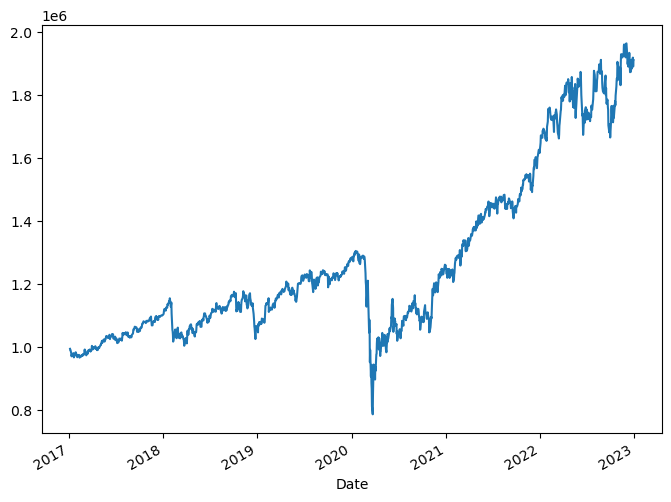

In [21]:
port_val["Total Pos"].plot(figsize=(8,6))

# Portfolio optimization


## New data frame with the logarithmic returns of each stock


In [38]:
Stocks=stocks.loc[:,[ "EXXON", "APPLE", "Coca_cola","DEO"]]
log_ret = np.log(Stocks/Stocks.shift(1))
log_ret.head()


,EXXON,APPLE,Coca_cola,DEO
Date,,,,
2017-01-04,NaN,NaN,NaN,NaN
2017-01-05,-0.015019,0.005073,0.002398,0.011771
2017-01-06,-0.000565,0.011087,-0.000240,-0.004034
2017-01-09,-0.016635,0.009118,-0.010113,0.001597
2017-01-10,-0.012835,0.001008,-0.006800,-0.006024


## Montecarlo simulation

In [15]:
num_ports = 500000

all_weights = np.zeros((num_ports,len(Stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
 

    
all_weights[sharpe_arr.argmax(),:]


array([4.10679552e-04, 6.28251835e-01, 2.15472231e-01, 1.55865255e-01])

## Maximum return, volatility and maximum sharpe ratio found after performing the Monte Carlo simulation


In [16]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
max_sharpe_ratio =     sharpe_arr.max()

print(" the max  average annual return  of  portafolio found   is {} percent " .format (max_sr_ret) )
print(" the max annual volatility of portafolio found is {} " .format(max_sr_vol))
print('the max sharpe ratio found was {} '.format(max_sharpe_ratio))

 the max  average annual return  of  portafolio found   is 0.20389041612823808 percent 
 the max annual volatility of portafolio found is 0.2376682179759854 
the max sharpe ratio found was 0.8578783392436581 


In [17]:
print(" the max    return found of  the portafolio in the analized period    is {} percent " .format (max_sr_ret*5*100))

 the max    return found of  the portafolio in the analized period    is 101.94520806411904 percent 


## Graph of all the simulated portfolios and the optimal portfolio


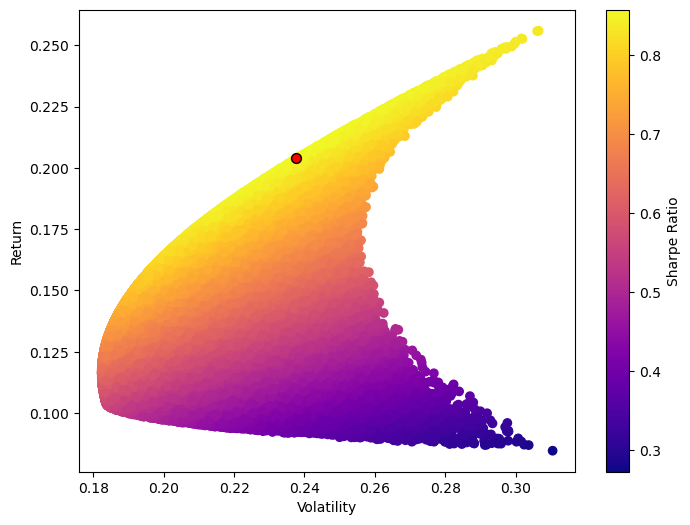

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(vol_arr,ret_arr, c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')